In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


o Line-plot
o Bar plot: stack, group
o Count plot
o Pie chart
o Dist plot
o Pair plot
o Heatmap with cbar
o Histogram plot with KDE
o QQ-plot
o KDE plot will fill, alpha = 0.6, chose a palette, chose a linewidth
o Im or reg plot with scatter representation and regression line
o Multivariate Box or Boxen plot
o Area plot
o Violin plot
o Joint plot with KDE and scatter representation
o Rug plot
o 3D plot and contour plot
o Cluster map
o Hexbin 

In [54]:
df_gas = pd.read_csv(r'C:\Users\Asus\Downloads\gas_prices.csv')

df_electricity = pd.read_csv(r'C:\Users\Asus\Downloads\electricity_prices.csv')

df_historical_weather = pd.read_csv(r'C:\Users\Asus\Downloads\historical_weather.csv\historical_weather.csv')

df_train = pd.read_csv(r'C:\Users\Asus\Downloads\train.csv (3)\train.csv')

df_client = pd.read_csv(r'C:\Users\Asus\OneDrive\Desktop\submission_project_viz\client.csv')

df_forecast_weather = pd.read_csv(r'C:\Users\Asus\OneDrive\Desktop\submission_project_viz\forecast_weather.csv')

weather_to_county = pd.read_csv(r'C:\Users\Asus\OneDrive\Desktop\submission_project_viz\weather_station_to_county_mapping.csv')


Title = [font: ‘serif’, color:’blue, size: large enough]
X, Y label = [font: ‘serif’, ‘color’, darkred] size large enough

In [55]:
df_client.head()

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2


In [56]:
df_electricity.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [29]:
df_train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


In [57]:
df_gas.head()

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5


In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   county              int64  
 1   is_business         int64  
 2   product_type        int64  
 3   target              float64
 4   is_consumption      int64  
 5   datetime            object 
 6   data_block_id       int64  
 7   row_id              int64  
 8   prediction_unit_id  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 138.6+ MB


In [10]:
#Target -  The consumption or production amount for the relevant segment for the hour. 
            #The segments are defined by the county, is_business, and product_type.

In [11]:
#data_block_id - All rows sharing the same data_block_id will be available at the same forecast time.
                #This is a function of what information is available when forecasts are actually made, at 11 AM each morning.
                #For example, if the forecast weather data_block_id for predictions made on October 31st is 100 then the historic weather data_block_id for October 31st will be 101 as the historic weather data is only actually available the next day.

In [59]:
df_train.describe()

,county,is_business,product_type,target,is_consumption,data_block_id,row_id,prediction_unit_id
count,2.018352e+06,2.018352e+06,2.018352e+06,2.017824e+06,2018352.0,2.018352e+06,2.018352e+06,2.018352e+06
mean,7.297034e+00,5.368261e-01,1.898927e+00,2.748556e+02,0.5,3.218746e+02,1.009176e+06,3.304538e+01
std,4.780990e+00,4.986421e-01,1.081766e+00,9.095024e+02,0.5,1.826343e+02,5.826482e+05,1.959059e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,1.000000e+00,3.780000e-01,0.0,1.660000e+02,5.045878e+05,1.600000e+01
50%,7.000000e+00,1.000000e+00,2.000000e+00,3.113300e+01,0.5,3.230000e+02,1.009176e+06,3.300000e+01
75%,1.100000e+01,1.000000e+00,3.000000e+00,1.802062e+02,1.0,4.790000e+02,1.513763e+06,5.000000e+01
max,1.500000e+01,1.000000e+00,3.000000e+00,1.548027e+04,1.0,6.370000e+02,2.018351e+06,6.800000e+01


In [60]:
df_train.isna().sum()

county                  0
is_business             0
product_type            0
target                528
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

In [61]:
df_train.dropna(inplace=True)

In [62]:
df_train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


In [63]:
df_train.datetime = pd.to_datetime(df_train.datetime)

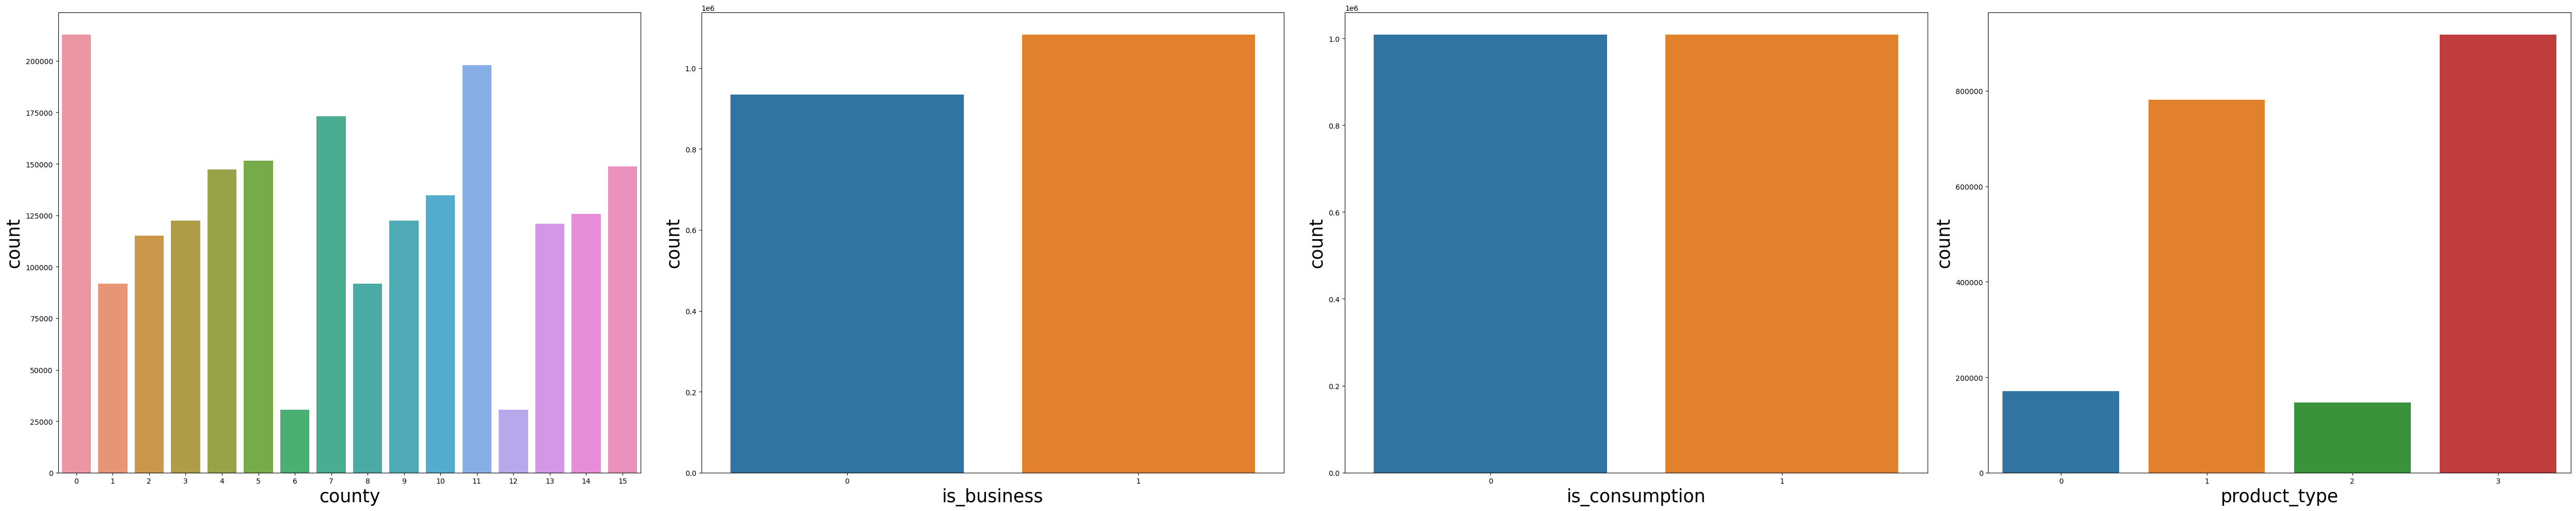

In [37]:
imp_cols = ['county', 'is_business', 'is_consumption', 'product_type']

fig, axes = plt.subplots(1, len(imp_cols), figsize = (50,10))

for i, e in enumerate(imp_cols):
    sns.countplot(data=df_train, x = e, ax = axes[i])
    axes[i].set_xlabel(e, fontsize=25)
    axes[i].set_ylabel('count', fontsize=25)
    
plt.tight_layout()

plt.savefig('countplot_enefit.png')
    

plt.show()




In [38]:
df_train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01,0,0,0
1,0,0,1,96.590,1,2021-09-01,0,1,0
2,0,0,2,0.000,0,2021-09-01,0,2,1
3,0,0,2,17.314,1,2021-09-01,0,3,1
4,0,0,3,2.904,0,2021-09-01,0,4,2


In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017824 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   county              int64         
 1   is_business         int64         
 2   product_type        int64         
 3   target              float64       
 4   is_consumption      int64         
 5   datetime            datetime64[ns]
 6   data_block_id       int64         
 7   row_id              int64         
 8   prediction_unit_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 153.9 MB


In [42]:
#Datetime features

In [64]:
df_train['date'] = df_train['datetime'].dt.date


In [65]:
df_train.date = pd.to_datetime(df_train.date)

In [66]:
df_train['date_year'] = df_train.datetime.dt.year

In [67]:
df_train['date_month'] = df_train.datetime.dt.month
df_train["date_day"] = df_train.datetime.dt.day
df_train["date_dayofyear"] = df_train.datetime.dt.dayofyear
df_train["date_dayofweek"] = df_train.datetime.dt.dayofweek
df_train["date_weekday"] = df_train.datetime.dt.weekday
df_train["time_hour"] = df_train.datetime.dt.hour
df_train["time_minute"] = df_train.datetime.dt.minute

In [68]:
df_train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,date,date_year,date_month,date_day,date_dayofyear,date_dayofweek,date_weekday,time_hour,time_minute
0,0,0,1,0.713,0,2021-09-01,0,0,0,2021-09-01,2021,9,1,244,2,2,0,0
1,0,0,1,96.590,1,2021-09-01,0,1,0,2021-09-01,2021,9,1,244,2,2,0,0
2,0,0,2,0.000,0,2021-09-01,0,2,1,2021-09-01,2021,9,1,244,2,2,0,0
3,0,0,2,17.314,1,2021-09-01,0,3,1,2021-09-01,2021,9,1,244,2,2,0,0
4,0,0,3,2.904,0,2021-09-01,0,4,2,2021-09-01,2021,9,1,244,2,2,0,0


In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017824 entries, 0 to 2018351
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   county              int64         
 1   is_business         int64         
 2   product_type        int64         
 3   target              float64       
 4   is_consumption      int64         
 5   datetime            datetime64[ns]
 6   data_block_id       int64         
 7   row_id              int64         
 8   prediction_unit_id  int64         
 9   date                datetime64[ns]
 10  date_year           int32         
 11  date_month          int32         
 12  date_day            int32         
 13  date_dayofyear      int32         
 14  date_dayofweek      int32         
 15  date_weekday        int32         
 16  time_hour           int32         
 17  time_minute         int32         
dtypes: datetime64[ns](2), float64(1), int32(8), int64(7)
memory usage: 230.9 MB


In [77]:
df_train.target

0            0.713
1           96.590
2            0.000
3           17.314
4            2.904
            ...   
2018347    197.233
2018348      0.000
2018349     28.404
2018350      0.000
2018351    196.240
Name: target, Length: 2017824, dtype: float64

In [87]:
df_train[(df_train['target'] >= 5000) & (df_train['target'] < 20000)]

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,date,date_year,date_month,date_day,date_dayofyear,date_dayofweek,date_weekday,time_hour,time_minute
11,0,1,3,5155.056,1,2021-09-01 00:00:00,0,11,5,2021-09-01,2021,9,1,244,2,2,0,0
743,0,1,3,5312.905,1,2021-09-01 06:00:00,0,743,5,2021-09-01,2021,9,1,244,2,2,6,0
865,0,1,3,5979.794,1,2021-09-01 07:00:00,0,865,5,2021-09-01,2021,9,1,244,2,2,7,0
987,0,1,3,6881.260,1,2021-09-01 08:00:00,0,987,5,2021-09-01,2021,9,1,244,2,2,8,0
1073,11,1,3,5025.613,1,2021-09-01 08:00:00,0,1073,48,2021-09-01,2021,9,1,244,2,2,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017975,0,1,3,9101.662,1,2023-05-31 21:00:00,637,2017975,5,2023-05-31,2023,5,31,151,2,2,21,0
2018061,11,1,3,5157.630,1,2023-05-31 21:00:00,637,2018061,48,2023-05-31,2023,5,31,151,2,2,21,0
2018105,0,1,3,8580.003,1,2023-05-31 22:00:00,637,2018105,5,2023-05-31,2023,5,31,151,2,2,22,0
2018191,11,1,3,5313.458,1,2023-05-31 22:00:00,637,2018191,48,2023-05-31,2023,5,31,151,2,2,22,0


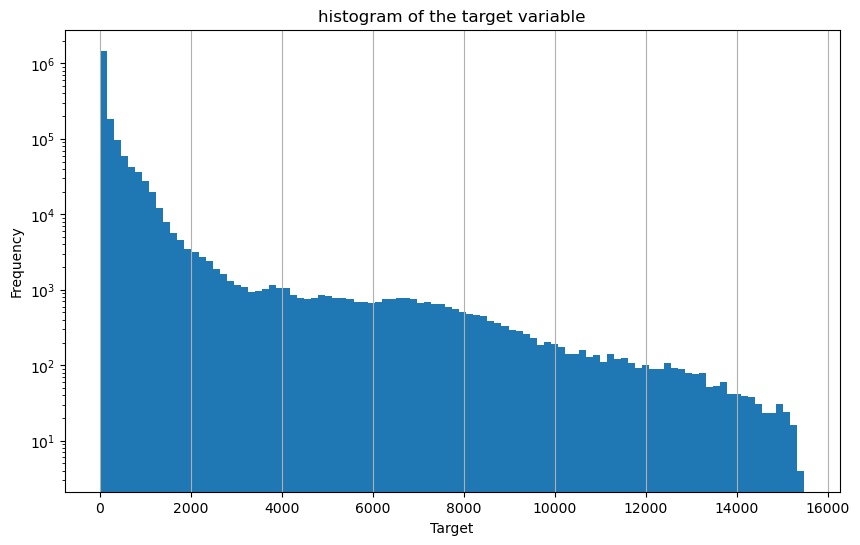

In [90]:
fig = plt.figure(figsize=(10, 6))


df_train.target.plot.hist(bins = 100, logy = True)

plt.xlabel('Target')

plt.ylabel('Frequency')

plt.title('histogram of the target variable')

plt.grid(axis = 'x')

In [91]:
df_train.head(5)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,date,date_year,date_month,date_day,date_dayofyear,date_dayofweek,date_weekday,time_hour,time_minute
0,0,0,1,0.713,0,2021-09-01,0,0,0,2021-09-01,2021,9,1,244,2,2,0,0
1,0,0,1,96.590,1,2021-09-01,0,1,0,2021-09-01,2021,9,1,244,2,2,0,0
2,0,0,2,0.000,0,2021-09-01,0,2,1,2021-09-01,2021,9,1,244,2,2,0,0
3,0,0,2,17.314,1,2021-09-01,0,3,1,2021-09-01,2021,9,1,244,2,2,0,0
4,0,0,3,2.904,0,2021-09-01,0,4,2,2021-09-01,2021,9,1,244,2,2,0,0


In [113]:
product_dict = df_train.product_type.value_counts()

In [121]:
product_dict

product_type
3    918480
1    781428
0    170500
2    147416
Name: count, dtype: int64

In [125]:
min_val = min(product_dict.values)

res = [k for k,v in product_dict.items() if v == min_val]

In [126]:
res

[2]

In [115]:
product_dict.keys()

Index([3, 1, 0, 2], dtype='int64', name='product_type')

In [116]:
min(product_dict)

147416

In [103]:
product_df = pd.DataFrame(product_dict)

In [104]:
product_df.head()

,count
product_type,
3,918480
1,781428
0,170500
2,147416


In [137]:
product_dict.items

<bound method Series.items of product_type
3    918480
1    781428
0    170500
2    147416
Name: count, dtype: int64>

In [138]:
product_dict

product_type
3    918480
1    781428
0    170500
2    147416
Name: count, dtype: int64

<Figure size 2500x1400 with 0 Axes>

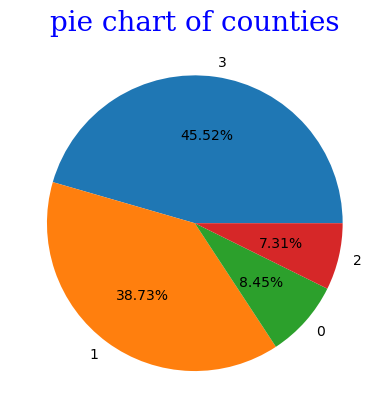

In [190]:
plt.figure(figsize=(25,14))
fig, ax = plt.subplots(1,1)


min_value = min(product_dict.values)

explode = [0.1 if c == min_value else 0 for c in product_dict.values]



ax.pie(product_dict.values, autopct='%1.2f%%', textprops={'fontsize': 10}, labels = product_dict.index)

# Title = [font: ‘serif’, color:’blue, size: large enough]
# X, Y label = [font: ‘serif’, ‘color’, darkred] size large enough

ax.set_title('pie chart of counties', fontdict={'family': 'serif', 'color': 'blue', 'size': 20})

plt.savefig('pie_chart')

plt.show()


In [145]:
# eic_count - The aggregated number of consumption points (EICs - European Identifier Code).

The term "EIC" stands for European Identifier Code. It is a unique identification code assigned to each electricity or gas metering point or to a power generating unit, trading point, or balancing zone.

The eic_count you mentioned likely represents the aggregated count of consumption points associated with a particular context, such as a region, a company, or some other grouping. This count gives you an idea of how many distinct metering points or units are being considered within that context.

product_type - ID code with the following mapping of codes to contract types: {0: "Combined", 1: "Fixed", 2: "General service", 3: "Spot"}.

data_block_id - All rows sharing the same data_block_id will be available at the same forecast time. 
This is a function of what information is available when forecasts are actually made, at 11 AM each morning. 
For example, if the forecast weather data_block_id for predictins made on October 31st is 100 
then the historic weather data_block_id for October 31st will be 101 
as the historic weather data is only actually available the next day.

installed_capacity - Installed photovoltaic solar panel capacity in kilowatts.


In [147]:
df_client.head(5)

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2


Text(0, 0.5, 'consumption points')

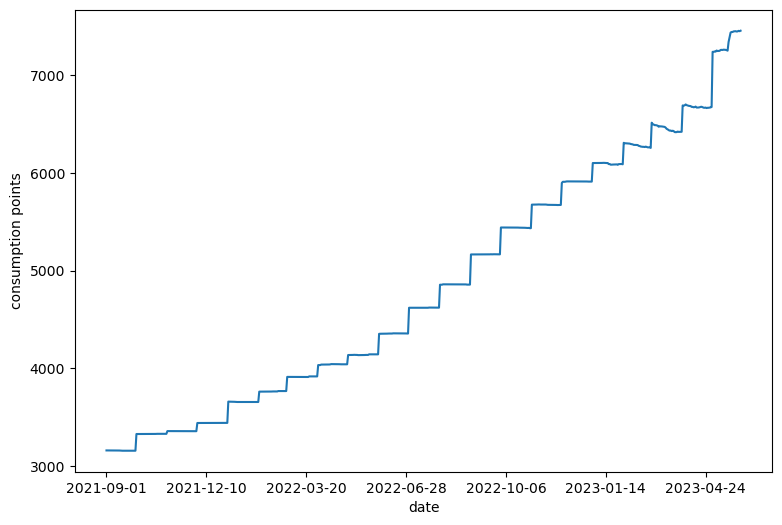

In [154]:
plt.figure(figsize=(9,6))
df_client.groupby('date')['eic_count'].sum().plot()

plt.xlabel('date')

plt.ylabel('consumption points')

In [177]:
dfy = df_client.groupby('date')['installed_capacity'].sum()


In [178]:
dfy = dfy.reset_index()

In [179]:
dfy.head()

,date,installed_capacity
0,2021-09-01,70659.26
1,2021-09-02,70659.26
2,2021-09-03,70659.26
3,2021-09-04,70659.26
4,2021-09-05,70651.26


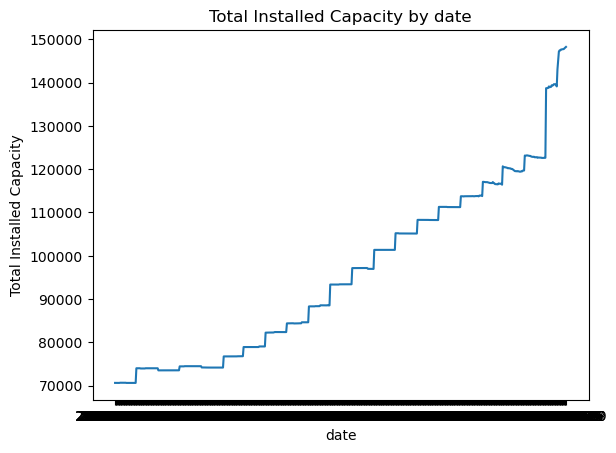

In [186]:
sns.lineplot(data = dfy, x = 'date', y = 'installed_capacity')

plt.xlabel('date')
plt.ylabel('Total Installed Capacity')
plt.title('Total Installed Capacity by date')
plt.show()

Text(0, 0.5, 'installed capacity')

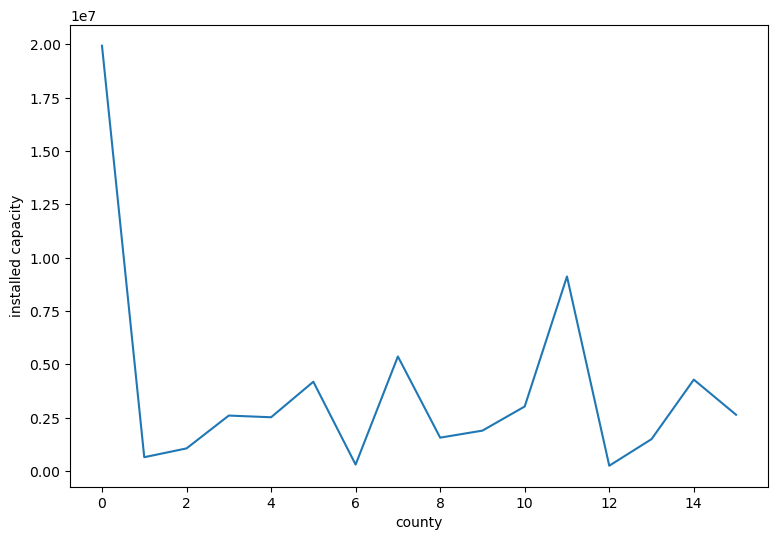

In [156]:
plt.figure(figsize=(9,6))

dfy = df_client.groupby('county')['installed_capacity'].sum()

sns.countplot(data = dfy, x = )

plt.xlabel('county')

plt.ylabel('installed capacity')

In [103]:
#Analyzing avergae production and consumption timeseries

In [19]:
dfx = df_train.groupby(['datetime', 'is_consumption'])['target'].mean().unstack().rename({0 : 'produced', 1: "consumption"}, axis = 1)

In [20]:
dfx.head()

is_consumption,produced,consumption
datetime,,
2021-09-01 00:00:00,0.071508,325.570623
2021-09-01 01:00:00,0.194295,315.820951
2021-09-01 02:00:00,0.030246,315.752328
2021-09-01 03:00:00,0.024869,311.909574
2021-09-01 04:00:00,0.040852,317.493836


In [21]:
dfx.columns

Index(['produced', 'consumption'], dtype='object', name='is_consumption')

In [22]:
dfx.index

DatetimeIndex(['2021-09-01 00:00:00', '2021-09-01 01:00:00',
               '2021-09-01 02:00:00', '2021-09-01 03:00:00',
               '2021-09-01 04:00:00', '2021-09-01 05:00:00',
               '2021-09-01 06:00:00', '2021-09-01 07:00:00',
               '2021-09-01 08:00:00', '2021-09-01 09:00:00',
               ...
               '2023-05-31 14:00:00', '2023-05-31 15:00:00',
               '2023-05-31 16:00:00', '2023-05-31 17:00:00',
               '2023-05-31 18:00:00', '2023-05-31 19:00:00',
               '2023-05-31 20:00:00', '2023-05-31 21:00:00',
               '2023-05-31 22:00:00', '2023-05-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=15308, freq=None)

In [23]:
# fig, ax = plt.subplots(figsize=(10, 6))

# dfx['produced'].plot(ax=ax, label='Produced')

# dfx['consumption'].plot(ax=ax, label='Consumption')

# ax.set_xlabel('Datetime')
# ax.set_ylabel('Mean Target')
# ax.set_title('Mean Target Production and Consumption')
# ax.legend()

# plt.show()

deductions from the following graph

- consumption peaks in the months of january, february and dips in the months of summer
- production peaks in months of summer and dips in winters i.e. january and february

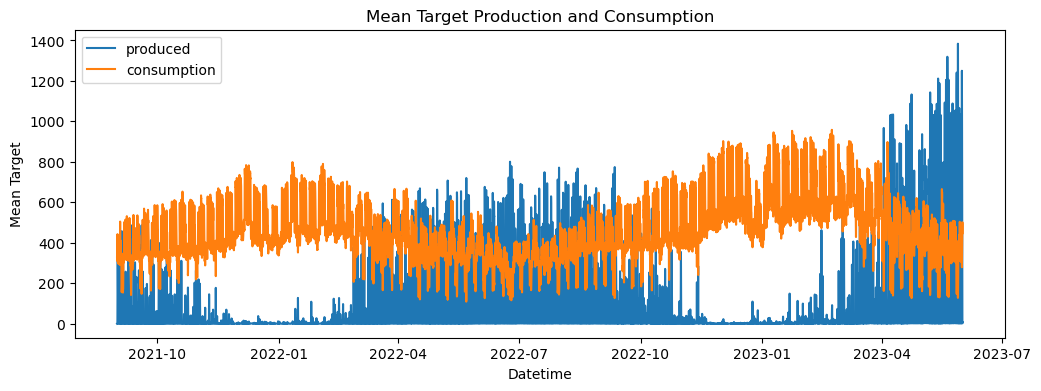

In [24]:
fig, ax = plt.subplots(1,1, figsize = (12,4))

ax.plot(dfx.index, dfx.produced, label = 'produced')

ax.plot(dfx.index, dfx.consumption, label = 'consumption')

ax.set_xlabel('Datetime')
ax.set_ylabel('Mean Target')
ax.set_title('Mean Target Production and Consumption')
ax.legend()

plt.show()


In [110]:
dfx.index

DatetimeIndex(['2021-09-01 00:00:00', '2021-09-01 01:00:00',
               '2021-09-01 02:00:00', '2021-09-01 03:00:00',
               '2021-09-01 04:00:00', '2021-09-01 05:00:00',
               '2021-09-01 06:00:00', '2021-09-01 07:00:00',
               '2021-09-01 08:00:00', '2021-09-01 09:00:00',
               ...
               '2023-05-31 14:00:00', '2023-05-31 15:00:00',
               '2023-05-31 16:00:00', '2023-05-31 17:00:00',
               '2023-05-31 18:00:00', '2023-05-31 19:00:00',
               '2023-05-31 20:00:00', '2023-05-31 21:00:00',
               '2023-05-31 22:00:00', '2023-05-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=15308, freq=None)

In [111]:
dfx.head()

is_consumption,produced,consumption
datetime,,
2021-09-01 00:00:00,0.071508,325.570623
2021-09-01 01:00:00,0.194295,315.820951
2021-09-01 02:00:00,0.030246,315.752328
2021-09-01 03:00:00,0.024869,311.909574
2021-09-01 04:00:00,0.040852,317.493836


In [112]:
#Patterns at monthly level

Text(0, 0.5, 'Average monthly')

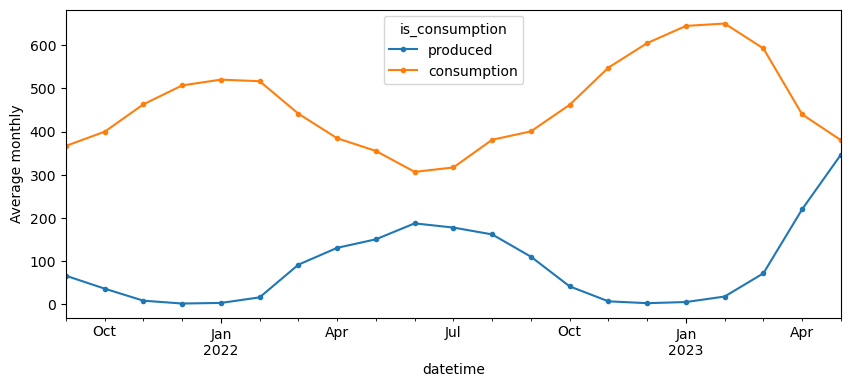

In [22]:
fig,ax = plt.subplots(1,1,figsize=(10,4))
dfx.resample('M').mean().plot(ax=ax, marker='.')
ax.set_ylabel('Average monthly')

Text(0.5, 0, 'Hour')

<Figure size 1200x600 with 0 Axes>

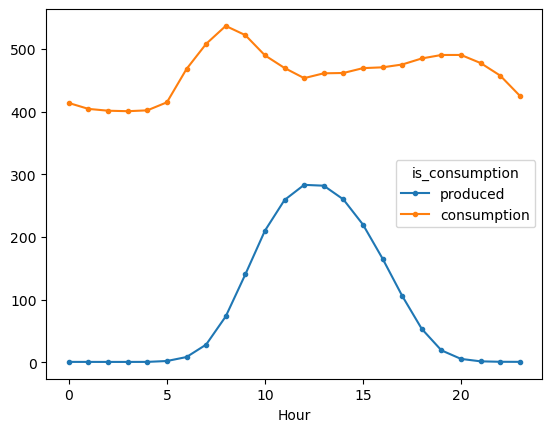

In [23]:
plt.figure(figsize=(12,6))
fig, ax = plt.subplots(1,1)

dfx.groupby(dfx.index.hour).mean().plot(ax = ax, marker = '.')

plt.xlabel('Hour')

In [85]:
#Gas prices

In [24]:
df_gas.head()

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5


In [25]:
df_train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01,0,0,0
1,0,0,1,96.590,1,2021-09-01,0,1,0
2,0,0,2,0.000,0,2021-09-01,0,2,1
3,0,0,2,17.314,1,2021-09-01,0,3,1
4,0,0,3,2.904,0,2021-09-01,0,4,2


In [26]:
df_gas.forecast_date = pd.to_datetime(df_gas.forecast_date)

In [27]:
df_gas.head()

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5


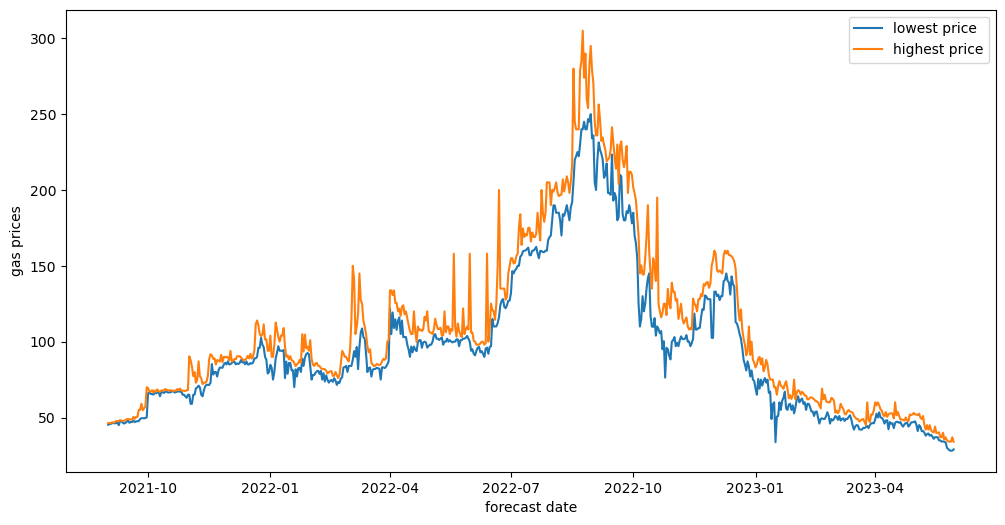

In [119]:
fig, ax = plt.subplots(1,1, figsize = (12,6))

sns.lineplot(data = df_gas,x = 'forecast_date', y = 'lowest_price_per_mwh', ax = ax, label = 'lowest price')

sns.lineplot(data = df_gas,x = 'forecast_date', y = 'highest_price_per_mwh', ax = ax, label = 'highest price')

ax.legend()

ax.set_xlabel('forecast date')

ax.set_ylabel('gas prices')

plt.show()

In [120]:
df_historical_weather.head()

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.2,11.6,0.0,0.0,1015.9,31,31,0,11,7.083333,8,0.0,0.0,0.0,57.6,21.7,1.0
1,2021-09-01 00:00:00,13.9,11.5,0.0,0.0,1010.7,33,37,0,0,5.111111,359,0.0,0.0,0.0,57.6,22.2,1.0
2,2021-09-01 00:00:00,14.0,12.5,0.0,0.0,1015.0,31,34,0,0,6.333333,355,0.0,0.0,0.0,57.6,22.7,1.0
3,2021-09-01 00:00:00,14.6,11.5,0.0,0.0,1017.3,0,0,0,0,8.083333,297,358.0,277.0,81.0,57.6,23.2,1.0
4,2021-09-01 00:00:00,15.7,12.9,0.0,0.0,1014.0,22,25,0,0,8.416667,5,0.0,0.0,0.0,57.6,23.7,1.0


In [28]:
df_train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01,0,0,0
1,0,0,1,96.590,1,2021-09-01,0,1,0
2,0,0,2,0.000,0,2021-09-01,0,2,1
3,0,0,2,17.314,1,2021-09-01,0,3,1
4,0,0,3,2.904,0,2021-09-01,0,4,2


In [30]:
df_train.datetime

0         2021-09-01 00:00:00
1         2021-09-01 00:00:00
2         2021-09-01 00:00:00
3         2021-09-01 00:00:00
4         2021-09-01 00:00:00
                  ...        
2018347   2023-05-31 23:00:00
2018348   2023-05-31 23:00:00
2018349   2023-05-31 23:00:00
2018350   2023-05-31 23:00:00
2018351   2023-05-31 23:00:00
Name: datetime, Length: 2017824, dtype: datetime64[ns]

In [32]:
df_client.head()

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2


In [33]:
df_client.date = pd.to_datetime(df_client.date)

In [37]:
df_train['date'] = df_train.datetime.dt.date

In [40]:
df_train.date = pd.to_datetime(df_train.date)

In [42]:
df_train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,date
0,0,0,1,0.713,0,2021-09-01,0,0,0,2021-09-01
1,0,0,1,96.590,1,2021-09-01,0,1,0,2021-09-01
2,0,0,2,0.000,0,2021-09-01,0,2,1,2021-09-01
3,0,0,2,17.314,1,2021-09-01,0,3,1,2021-09-01
4,0,0,3,2.904,0,2021-09-01,0,4,2,2021-09-01


In [43]:
df_client.head()

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2


In [44]:
df_train.columns.intersection(df_client.columns)

Index(['county', 'is_business', 'product_type', 'data_block_id', 'date'], dtype='object')

In [45]:
df_train = df_train.merge(df_client, on = ['county', 'is_business', 'product_type', 'date'], how = 'left')

In [48]:
# eic_count - The aggregated number of consumption points (EICs - European Identifier Code).

In [46]:
df_train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id_x,row_id,prediction_unit_id,date,eic_count,installed_capacity,data_block_id_y
0,0,0,1,0.713,0,2021-09-01,0,0,0,2021-09-01,108.0,952.89,2.0
1,0,0,1,96.590,1,2021-09-01,0,1,0,2021-09-01,108.0,952.89,2.0
2,0,0,2,0.000,0,2021-09-01,0,2,1,2021-09-01,17.0,166.40,2.0
3,0,0,2,17.314,1,2021-09-01,0,3,1,2021-09-01,17.0,166.40,2.0
4,0,0,3,2.904,0,2021-09-01,0,4,2,2021-09-01,688.0,7207.88,2.0


In [47]:
df_train.isna().sum()

county                   0
is_business              0
product_type             0
target                   0
is_consumption           0
datetime                 0
data_block_id_x          0
row_id                   0
prediction_unit_id       0
date                     0
eic_count             6240
installed_capacity    6240
data_block_id_y       6240
dtype: int64

In [55]:
df_train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id_x,row_id,prediction_unit_id,date,eic_count,installed_capacity,data_block_id_y
0,0,0,1,0.713,0,2021-09-01,0,0,0,2021-09-01,108.0,952.89,2.0
1,0,0,1,96.590,1,2021-09-01,0,1,0,2021-09-01,108.0,952.89,2.0
2,0,0,2,0.000,0,2021-09-01,0,2,1,2021-09-01,17.0,166.40,2.0
3,0,0,2,17.314,1,2021-09-01,0,3,1,2021-09-01,17.0,166.40,2.0
4,0,0,3,2.904,0,2021-09-01,0,4,2,2021-09-01,688.0,7207.88,2.0
